Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: vc2118
-   **Name**: Venkata Naga Sai Kiran Challa 

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=694ae9957380f150'
df = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [3]:
# TODO Q2
# use info()
df.info()   # Gives us basic information of the dataset
# It's 516697 * 13, and has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516697 entries, 0 to 516696
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 515810 non-null  object 
 1   country_region                                      516697 non-null  object 
 2   sub_region_1                                        501307 non-null  object 
 3   sub_region_2                                        298720 non-null  object 
 4   iso_3166_2_code                                     187299 non-null  object 
 5   census_fips_code                                    298834 non-null  float64
 6   date                                                516697 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  400610 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   385086 non-n

In [4]:
# TODO Q3
# use head()
df.head()    # Prints first 5 rows

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [5]:
# TODO Q4
# df['date'] = ...
# Converting to date format
df['date'] = pd.to_datetime(df['date'])
df.info()    # Check if its converted - yes, it is converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516697 entries, 0 to 516696
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 515810 non-null  object        
 1   country_region                                      516697 non-null  object        
 2   sub_region_1                                        501307 non-null  object        
 3   sub_region_2                                        298720 non-null  object        
 4   iso_3166_2_code                                     187299 non-null  object        
 5   census_fips_code                                    298834 non-null  float64       
 6   date                                                516697 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  400610 non-null  float64       

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [6]:
# TODO Q5
# df_subset =
#df[(df['country_region'].eq("India"))]
df[(df['country_region'].eq("India")) & (df['sub_region_1'].eq("Maharashtra"))].info() # No Mumbai, so we can stop here - no sub_region_2 values
df_subset = df[(df['country_region'].eq("India")) & (df['sub_region_1'].eq("Maharashtra"))]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 93711 to 93824
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 114 non-null    object        
 1   country_region                                      114 non-null    object        
 2   sub_region_1                                        114 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     114 non-null    object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                114 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  114 non-null    float64       
 8   groc

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [7]:
# TODO Q6
# df_subset
# Kindof re-iterating the abouve step, check if there are missing values
df_subset.info() # There are no missing values except for sub_region_2 and census_fips_code, and all the persentage changes are intact

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 93711 to 93824
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 114 non-null    object        
 1   country_region                                      114 non-null    object        
 2   sub_region_1                                        114 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     114 non-null    object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                114 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  114 non-null    float64       
 8   groc

In [8]:
#Having a look at data
df_subset

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
93711,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-02-15,-3.0,-1.0,2.0,3.0,2.0,0.0
93712,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-02-16,0.0,-1.0,1.0,2.0,0.0,0.0
93713,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-02-17,-2.0,0.0,0.0,0.0,1.0,1.0
93714,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-02-18,0.0,1.0,1.0,2.0,1.0,0.0
93715,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-02-19,-1.0,-1.0,7.0,-3.0,-12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93820,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-03,-82.0,-46.0,-73.0,-69.0,-61.0,30.0
93821,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-04,-76.0,-29.0,-71.0,-62.0,-58.0,26.0
93822,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-05,-73.0,-21.0,-68.0,-59.0,-54.0,26.0
93823,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-06,-74.0,-24.0,-71.0,-57.0,-46.0,23.0


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

In [0]:
#Added empty code block for easy finding the answer.

**Q7 Reasponse:** Fortunately, the subset I chose did not have any missing values. Although, having missing values are perfectly acceptable as data that doesn't meet Google's privacy threshold is not included in the dataset, and this data should be considered as unknown data rather than assuming that those values are not busy.
Source : https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927


In [0]:
#End of the answer!!

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_ny_all['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [0]:
# TODO Q8
days_since_lockdown = (df_subset[df_subset['date']>= pd.to_datetime('2020-03-25 00:00:00')]['date']- pd.to_datetime('2020-03-25 00:00:00')).dt.days # days from the lockdown initiation 
# India lockdown 25th March, 2020 https://www.nytimes.com/2020/03/24/world/asia/india-coronavirus-lockdown.html and is still in effect
# Eventhough India has extended the lockdown 3 times, I chose that date as it's the first lockdowm and people will be more willing to follow rules.

In [10]:
days_since_lockdown # Index and value,  I have created the data set down before ploting

93750     0
93751     1
93752     2
93753     3
93754     4
         ..
93820    70
93821    71
93822    72
93823    73
93824    74
Name: date, Length: 75, dtype: int64

In [11]:
days_since_lockdown = days_since_lockdown.values # We need this for ploting
days_since_lockdown

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74])

Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

In [12]:
# TODO Q9
#First create the subset of data after lockdown
df_after = df_subset[df_subset['date']>=pd.to_datetime('2020-03-25 00:00:00')]
df_after # We got data from 25th March

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
93750,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-03-25,-82.0,-67.0,-63.0,-81.0,-81.0,37.0
93751,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-03-26,-80.0,-63.0,-61.0,-79.0,-78.0,36.0
93752,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-03-27,-80.0,-62.0,-61.0,-79.0,-77.0,36.0
93753,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-03-28,-82.0,-66.0,-64.0,-79.0,-74.0,34.0
93754,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-03-29,-82.0,-68.0,-67.0,-77.0,-57.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93820,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-03,-82.0,-46.0,-73.0,-69.0,-61.0,30.0
93821,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-04,-76.0,-29.0,-71.0,-62.0,-58.0,26.0
93822,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-05,-73.0,-21.0,-68.0,-59.0,-54.0,26.0
93823,IN,India,Maharashtra,NaN,IN-MH,NaN,2020-06-06,-74.0,-24.0,-71.0,-57.0,-46.0,23.0


In [0]:
#Let's Prepare
x = (df_subset['date'] - pd.to_datetime('2020-03-25 00:00:00')).dt.days.values # We will plot from begining to get an idea.
y_retail_and_recreation_percent_change_from_baseline = df_subset['retail_and_recreation_percent_change_from_baseline']
y_grocery_and_pharmacy_percent_change_from_baseline = df_subset['grocery_and_pharmacy_percent_change_from_baseline']
y_parks_percent_change_from_baseline = df_subset['parks_percent_change_from_baseline']
y_transit_stations_percent_change_from_baseline = df_subset['transit_stations_percent_change_from_baseline']
y_workplaces_percent_change_from_baseline = df_subset['workplaces_percent_change_from_baseline']
y_residential_percent_change_from_baseline = df_subset['residential_percent_change_from_baseline']

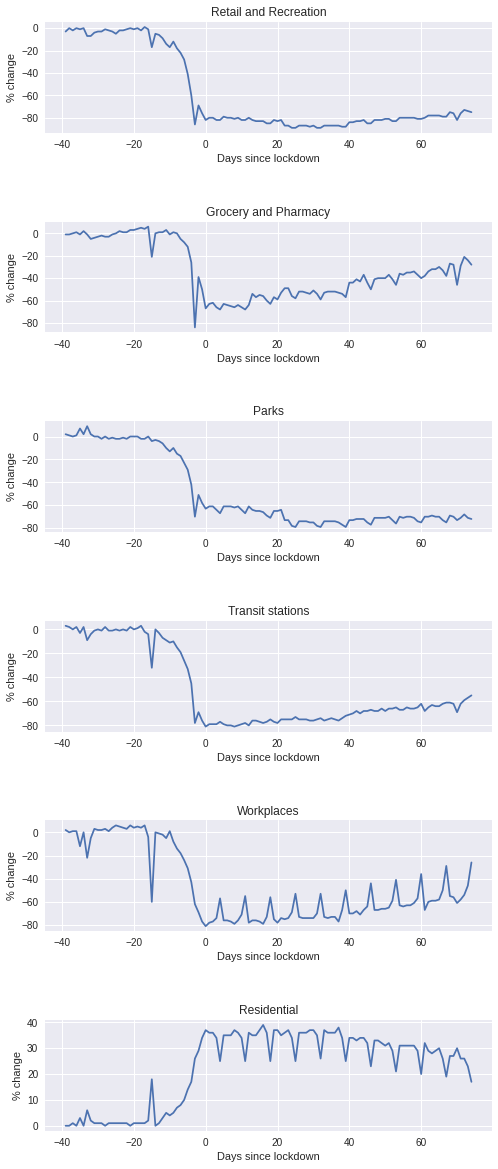

In [32]:
#Plot plot plot

plt.style.use("seaborn") # To add looks
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=2.9, wspace=0.2, hspace=0.8) # To provide spacing between plots
# Set up a subplot grid that has height 6 and width 1,
# and set the first such subplot as active.
plt.subplot(6, 1, 1)

# Make the first plot
plt.plot(x, y_retail_and_recreation_percent_change_from_baseline)
plt.title('Retail and Recreation')
plt.xlabel('Days since lockdown')
plt.ylabel('% change')

# Set the second subplot as active, and make the second plot.
plt.subplot(6, 1, 2)
plt.plot(x, y_grocery_and_pharmacy_percent_change_from_baseline)
plt.title('Grocery and Pharmacy')
plt.xlabel('Days since lockdown')
plt.ylabel('% change')

# Set the third subplot as active, and make the third plot.
plt.subplot(6, 1, 3)
plt.plot(x, y_parks_percent_change_from_baseline)
plt.title('Parks')
plt.xlabel('Days since lockdown')
plt.ylabel('% change')

# Set the fourth subplot as active, and make the fourth plot.
plt.subplot(6, 1, 4)
plt.plot(x, y_transit_stations_percent_change_from_baseline)
plt.title('Transit stations')
plt.xlabel('Days since lockdown')
plt.ylabel('% change')

# Set the fifth subplot as active, and make the fifth plot.
plt.subplot(6, 1, 5)
plt.plot(x, y_workplaces_percent_change_from_baseline)
plt.title('Workplaces')
plt.xlabel('Days since lockdown')
plt.ylabel('% change')

# Set the final subplot as active, and make the final plot.
plt.subplot(6, 1, 6)
plt.plot(x, y_residential_percent_change_from_baseline)
plt.title('Residential')
plt.xlabel('Days since lockdown')
plt.ylabel('% change')
# Show the figure.
plt.show()

**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

In [0]:
#Added code bock so that answers can be easily distinguished

**Q10 Response**  For the most part data seems to make sense. We can notice that Grocery and Pharmacy purchases are reaching normal stages.
We can also see 10 peaks for Residential and workspaces signifying the weekends. So, we see a decline in people staying in residential areas on weekends. But these peaks don't make any sense for Workspaces - maybe they have been asked to report once a week.

**Question 11 Response** Let's try to break down our data with the given 5 checklist.

Note: The baseline is calibrated between Jan 3rd and Feb 6th of 2020, so all the percentage changes are with respective data.


Did anything significant happen between Jan 3 and Feb 6, 2020?

The main significant event that happened is the annual Indian festival called "Pongal" which lasts for one week, in which people go to their hometowns and celebrate it.

How do park visitors change from January to now?

Climate is more comfortable in January and February compared to the summer months, which accounts for more frequent park visits during those months. We also generally don't find park data available to compare this trend with the previous years.

How much more time do you think people will spend in residential places?


From the first lockdown, we know that schools are closed but some offices have used different techniques to limit capacity which are not openly known. At the same time few medical staff had to work double shifts which will impact the time spent in residential areas, which we need to take into account.


How might types of work affect the mobility changes on weekdays or weekends?

Due to the travel restrictions, online food delivery systems like swiggy started delivering food with drones in certain limited areas which is impossible to know the reason for reduced congestion in those areas by looking into the dataset. 

How well is your region represented?

The data didn't consider a lot of mini grocery stores that people still go to as they are not recognised by Google maps, which account for a considerable chunk in grocery purchases. It also didn't account for places like dockyard and air bases that people are going where phones are not allowed. For instance, there is a museum in front of the dockyard where most phones are turned off and back on before leaving and entering the base, so this might be considered a recreational visit and negatively affect the visitors to workplaces.




 All in all, the data has a lot of problems which requires a lot of domain knowledge to filter out the data. Even, this will not be sufficient as there are flaws in baseline data as well. Thus, a model trained on this data will not be able to predict accurate results.



